In [1]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import cm

In [2]:
from library.trajectory import Trajectory
# uzh trajectory toolbox
sys.path.append(os.path.abspath('library/rpg_trajectory_evaluation/src/rpg_trajectory_evaluation'))
import plot_utils as pu

In [3]:
%matplotlib inline

rc('font', **{'family': 'serif', 'serif': ['Cardo']})
rc('text', usetex=True)

### Parameters (to specify/set)

In [4]:
# directory where the data is saved
DATA_DIR = '/home/mayankm/my_projects/multiview_deeptam_3DV/multi-camera-deeptam/resources/data/cvg_cams'
# directory to save the output
RESULTS_DIR = os.path.abspath('eval')
# format in which to save the plots
FORMAT = '.png'

In [5]:
# set the camera indices to plot
CAM_IDXS = [0, 2, 4, 6, 8]
# set the reference camera (in case groundtruth is not available)
REF_CAM_ID = 0

In [14]:
# evaluation parameters
align_type = 'none' # choose from ['posyaw', 'sim3', 'se3', 'none']
align_num_frames  = -1

### Variables to allow the plots to look nice

In [15]:
N = len(CAM_IDXS)

ALGORITHM_CONFIGS = []
for i in range(N):
    ALGORITHM_CONFIGS.append('cam_%d' % CAM_IDXS[i])

# These are the labels that will be displayed for items in ALGORITHM_CONFIGS
PLOT_LABELS = { 'cam_0': 'Camera 0',
                'cam_2': 'Camera 2',
                'cam_4': 'Camera 4',
                'cam_6': 'Camera 6',
                'cam_8': 'Camera 8'}

PLOT_LABELS['cam_%d' % REF_CAM_ID] = PLOT_LABELS['cam_%d' % REF_CAM_ID] + ' (ref)'

In [16]:
# assgin colors to different configurations
COLORS = {}
color = iter(cm.plasma(np.linspace(0, 0.75, N)))
for i in range(N):
    COLORS['cam_%d' % CAM_IDXS[i]] = next(color)

### Defining the txt files with the pose information

In [17]:
# file name for reference trajectory
ref_traj_file = os.path.join(DATA_DIR, 'cam_%d' % REF_CAM_ID, 'groundtruth.txt')
# file names for camera trajectories
estimated_traj_files = []
for i in range(N):
    # path to camera trajectory
    estimated_traj_file = os.path.join(DATA_DIR, 'cam_%d' % CAM_IDXS[i], 'groundtruth.txt')
    assert os.path.exists(estimated_traj_file), "No corresponding file exists: %s!" % estimated_traj_file
    estimated_traj_files.append(estimated_traj_file)

# Main

In [18]:
print("Going to analyze the results in {0}.".format(DATA_DIR))
print("The plots will saved in {0}.".format(RESULTS_DIR))

if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
os.makedies(RESULTS_DIR, )

Going to analyze the results in /home/mayankm/my_projects/multiview_deeptam_3DV/multi-camera-deeptam/resources/data/cvg_cams.
The plots will saved in /home/mayankm/my_projects/multiview_deeptam_3DV/multi-camera-deeptam/utils/evaluation.


In [19]:
print("#####################################")
print(">>> Start loading and preprocessing all trajectories...")
print("#####################################")

config_trajectories_list = []
for i in range(N):
    # create instance of trajectory object
    cur_traj = Trajectory(RESULTS_DIR, run_name='cam_%d' % CAM_IDXS[i], gt_traj_file=ref_traj_file, estimated_traj_file=estimated_traj_files[i], \
                         align_type=align_type, align_num_frames=align_num_frames)
    config_trajectories_list.append(cur_traj)

#####################################
>>> Start loading and preprocessing all trajectories...
#####################################
Loading trajectory data...
loading dataset in /home/mayankm/my_projects/multiview_deeptam_3DV/multi-camera-deeptam/utils/evaluation
...done.
Computing preset subtrajectory lengths for relative errors...
Use percentage [0.1, 0.2, 0.3, 0.4, 0.5] of trajectory length.
...done. Computed preset subtrajecory lengths: [0.0, 0.0, 0.0, 0.0, 1.0]
Aliging the trajectory estimate to the groundtruth...
Alignment type is none.
To align all frames.
... trajectory alignment done.
Loading trajectory data...
loading dataset in /home/mayankm/my_projects/multiview_deeptam_3DV/multi-camera-deeptam/utils/evaluation
...done.
Computing preset subtrajectory lengths for relative errors...
Use percentage [0.1, 0.2, 0.3, 0.4, 0.5] of trajectory length.
...done. Computed preset subtrajecory lengths: [0.0, 0.0, 0.0, 0.0, 1.0]
Aliging the trajectory estimate to the groundtruth...
Alignm

No handles with labels found to put in legend.


#####################################
>>> Start plotting results....
#####################################
Plotting for cam_0
Plotting for cam_2
Plotting for cam_4
Plotting for cam_6
Plotting for cam_8


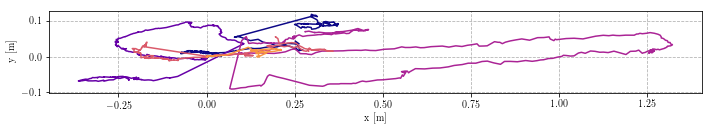

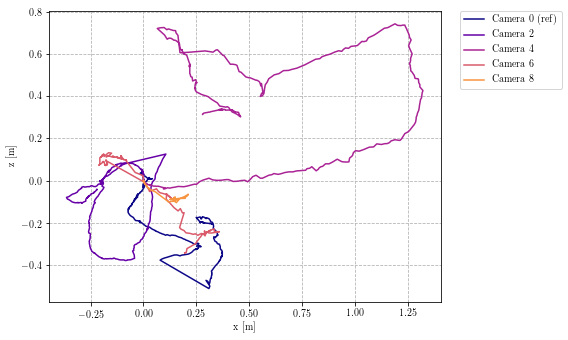

In [20]:
print("#####################################")
print(">>> Start plotting results....")
print("#####################################")

p_gt_0 = config_trajectories_list[0].p_gt
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111, aspect='equal',
                     xlabel='x [m]', ylabel='y [m]')
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(111, aspect='equal',
                  xlabel='x [m]', ylabel='z [m]')

# pu.plot_trajectory_top(ax1, p_gt_0, 'k', 'Groundtruth')
# pu.plot_trajectory_side(ax2, p_gt_0,'k', 'Groundtruth')

for i in range(N):
    
    traj = config_trajectories_list[i]
    p_es_0 = traj.p_es_aligned
    alg = ALGORITHM_CONFIGS[i]
    print('Plotting for %s' % alg)
    
    # plot trajectory
    pu.plot_trajectory_top(ax1, p_es_0, COLORS[alg], PLOT_LABELS[alg])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig1.tight_layout()

    # plot trajectory side
    pu.plot_trajectory_side(ax2, p_es_0, COLORS[alg], PLOT_LABELS[alg])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig2.tight_layout()

In [21]:
fig1.savefig(RESULTS_DIR + '/plots/trajectory_top_' + align_type + FORMAT,bbox_inches="tight")
plt.close(fig1)
fig2.savefig(RESULTS_DIR + '/plots/trajectory_side_' + align_type + FORMAT, bbox_inches="tight")
plt.close(fig2)